# Simple RNN

In [2]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

import matplotlib.pyplot as plt
%matplotlib inline


## Generate Dataset
**Generate a sin series with additional noise**

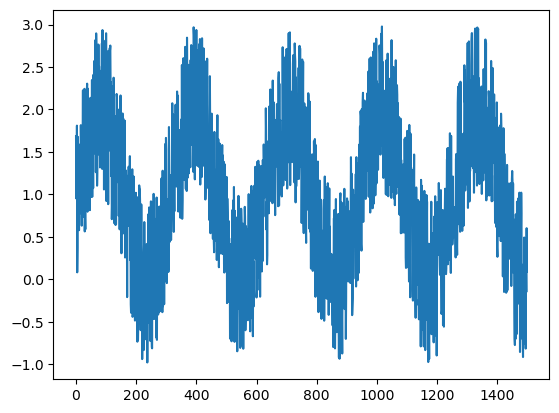

In [3]:
samples = 1500
t = np.arange(0, samples)
x = np.sin(0.02 * t) + np.random.rand(samples) * 2
# x = np.sin(0.02 * t) + np.random.rand(samples)  *5
# x = np.sin(t)
plt.plot(x)

## Exploding/Vanishing Gradient

exploding gradient value=  2.7048138294215285
vanishing gradient value=  2.656139888758738e-105


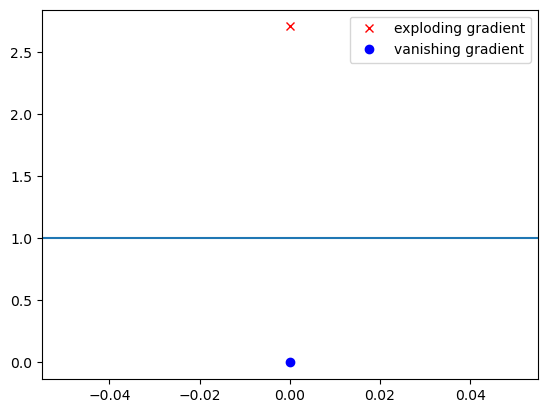

In [45]:
explod = 1.01 ** 100
vanish = 0.09 ** 100

print('exploding gradient value= ', explod)
print('vanishing gradient value= ', vanish)

plt.plot(explod, 'rx', label='exploding gradient')

plt.axhline(1)

plt.plot(vanish, 'bo', label='vanishing gradient')

plt.legend()

### Split Tarin and test set
**Select first 1000 element as train set, and the rest as test set**

In [3]:
train_quta = int(samples * 0.8)
# test_quta = int(samples * 0.2)

train, test = x[:train_quta], x[train_quta:]

### Prepare data: Create Data and labels
**NOTE: it is important for RNN to input data as a series, so a step must be consider for RNN**
**We have to open time steps to solve the problem = Create bunch of time seriese which is known as unRoll**

In [4]:
step =10

# convert into daaset and labels
def convertToDataset(data, step):
#     data = np.append(data, np.repeat(data[-1,], step))
    x, y = [], []
    for i in range(len(data) - step):
        d = i + step
        x.append(data[i:d,])
        y.append(data[d,])
        
    return np.array(x), np.array(y)


In [5]:
trainX, trainy= convertToDataset(train, step)
testX, testy= convertToDataset(test, step)


In [6]:
print(trainX.shape)
print(trainy.shape)

print(testX.shape)
print(testy.shape)



(1190, 10)
(1190,)
(290, 10)
(290,)


## Modify data dimention to input into RNN
### RNN Input type in Keras is like:
**(Number of Sequences, TimeSteps, Element perStep [Features])**<br/>
**(Mini-Batch, unRoll,  number of Features)**


In [7]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [8]:
print(trainX.shape)
print(testX.shape)

(1190, 10, 1)
(290, 10, 1)


## Model Architecture and compile
**Number of units = Hidden State Neurons**

In [9]:
model = Sequential()
model.add(SimpleRNN(units=64, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [10]:
%%time
history = model.fit (trainX, trainy, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
75/75 - 1s - loss: 0.4158 - 552ms/epoch - 7ms/step
Epoch 2/100
75/75 - 0s - loss: 0.3765 - 57ms/epoch - 765us/step
Epoch 3/100
75/75 - 0s - loss: 0.3768 - 77ms/epoch - 1ms/step
Epoch 4/100
75/75 - 0s - loss: 0.3731 - 56ms/epoch - 748us/step
Epoch 5/100
75/75 - 0s - loss: 0.3705 - 65ms/epoch - 871us/step
Epoch 6/100
75/75 - 0s - loss: 0.3684 - 78ms/epoch - 1ms/step
Epoch 7/100
75/75 - 0s - loss: 0.3716 - 64ms/epoch - 850us/step
Epoch 8/100
75/75 - 0s - loss: 0.3620 - 63ms/epoch - 834us/step
Epoch 9/100
75/75 - 0s - loss: 0.3617 - 65ms/epoch - 871us/step
Epoch 10/100
75/75 - 0s - loss: 0.3586 - 78ms/epoch - 1ms/step
Epoch 11/100
75/75 - 0s - loss: 0.3554 - 64ms/epoch - 849us/step
Epoch 12/100
75/75 - 0s - loss: 0.3511 - 63ms/epoch - 837us/step
Epoch 13/100
75/75 - 0s - loss: 0.3493 - 52ms/epoch - 692us/step
Epoch 14/100
75/75 - 0s - loss: 0.3455 - 79ms/epoch - 1ms/step
Epoch 15/100
75/75 - 0s - loss: 0.3433 - 64ms/epoch - 847us/step
Epoch 16/100
75/75 - 0s - loss: 0.3424 - 63

In [11]:
# Must specify input shape or fit the model before run this command
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.input

<KerasTensor: shape=(None, 10, 1) dtype=float32 (created by layer 'simple_rnn_input')>

## Model Evaluation

In [13]:
history.history.keys()

dict_keys(['loss'])

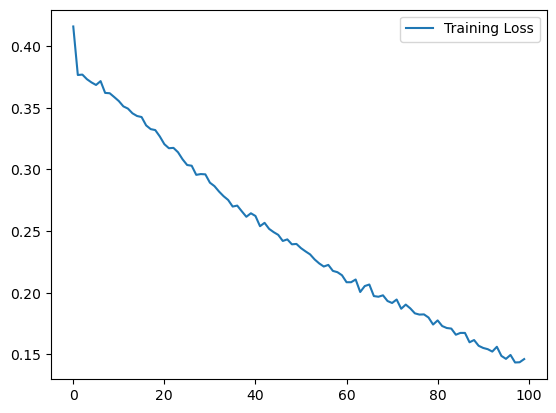

In [14]:
loss = history.history['loss']
plt.plot(loss, label='Training Loss')
plt.legend()



In [15]:
trainScore = model.evaluate(trainX, trainy, verbose=0)
print(trainScore)

testScore = model.evaluate(testX, testy, verbose=0)
print(testScore)

0.13450086116790771
0.5285547971725464


## Prediction

In [16]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

predict = np.concatenate((trainPredict, testPredict), axis=0)

10/10 [==============================] - 0s 0s/step


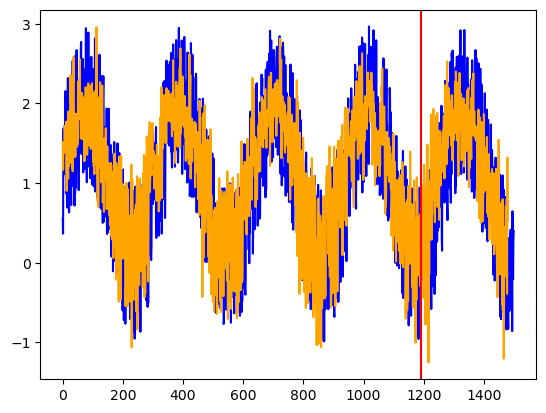

In [17]:
plt.plot(x, color='blue')
plt.plot(predict, color='orange')
plt.axvline(len(trainX), color='r')
plt.show()

## Input with different shape

In [18]:
testX, testY = convertToDataset(test, 50)

In [21]:
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testX.shape

(250, 50, 1)

In [22]:
testPredict = model.predict(testX)

8/8 [==============================] - 0s 2ms/step


In [ ]:
plt.plot(x, color='blue')
plt.plot(test, color='orange')